#  Лаборатороная работа №6

In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)

## Класс чужой - Треугольное распределение

In [3]:
num_samples_foreign: int = 1000
foreign_samples = np.random.triangular(
    left=-2,
    mode=3,
    right=8,
    size=num_samples_foreign,
)

## Класс свой - Треугольное распределение

In [4]:
num_samples_own: int = 500
own_samples = np.random.triangular(
    left=-4,
    mode=-2,
    right=0,
    size=num_samples_own,
)

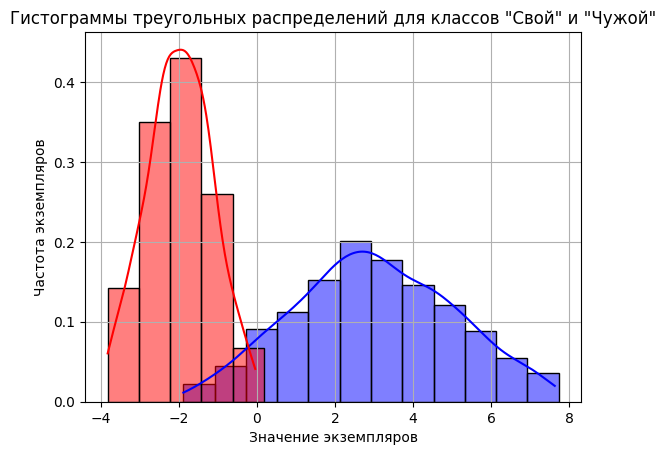

In [5]:
from collections import Counter

plt.figure()

own_counter = np.array(Counter(np.floor(own_samples)).most_common())
own_counter = sorted(own_counter, key=lambda x: x[0])

foreign_counter = np.array(Counter(np.floor(foreign_samples)).most_common())
foreign_counter = sorted(foreign_counter, key=lambda x: x[0])

sns.histplot(data=foreign_samples, color='blue', kde=True, binwidth=0.8, stat="density")
sns.histplot(data=own_samples, color='red', kde=True, binwidth=0.8, stat="density")

plt.xlabel('Значение экземпляров')
plt.ylabel('Частота экземпляров')
plt.title('Гистограммы треугольных распределений для классов "Свой" и "Чужой"')
plt.grid(True)

In [6]:
def kernel(x, x1, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - x1) ** 2 / (2 * sigma ** 2))


def parzen_window(bins, x, sigma, n):
    result = 0
    for bin in bins:
        result = result + bin[1] * kernel(x, bin[0], sigma)
    result = result / n
    return result

In [7]:
def plot_samples(own_counter, own_n, foreign_counter, foreign_n, sigma):
    x = np.arange(-4, 8, 0.2)
    own_y = parzen_window(own_counter, x, sigma, own_n)
    foreign_y = parzen_window(foreign_counter, x, sigma, foreign_n)
    sns.histplot(data=foreign_samples, color='blue', kde=True, binwidth=0.8, stat="density")
    sns.histplot(data=own_samples, color='red', kde=True, binwidth=0.8, stat="density")
    plt.plot(x, own_y, linestyle='--', color='orange')
    plt.plot(x, foreign_y, linestyle='--')
    plt.title(f'Sigma = {sigma}')
    plt.ylabel('Частота')
    plt.show()

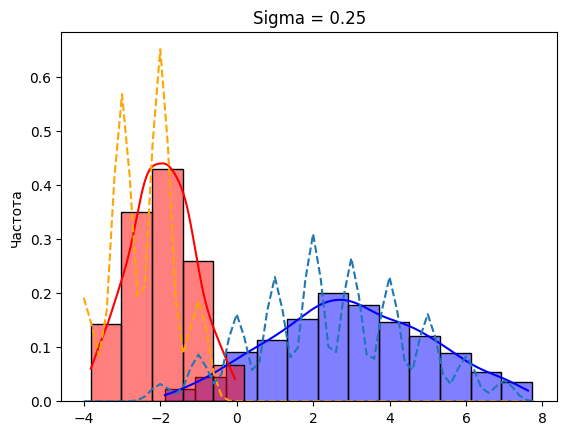

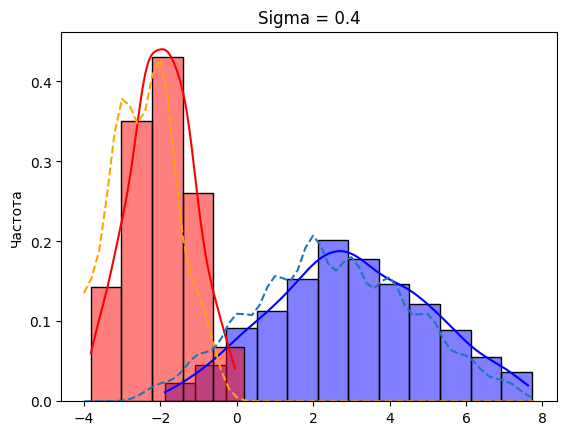

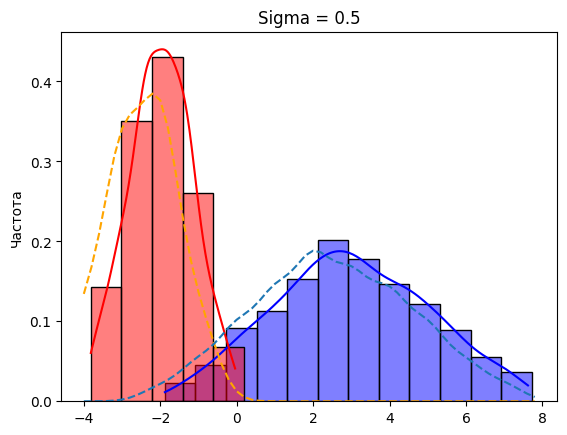

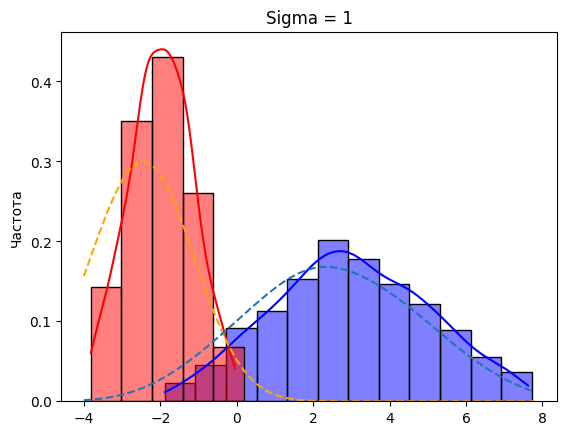

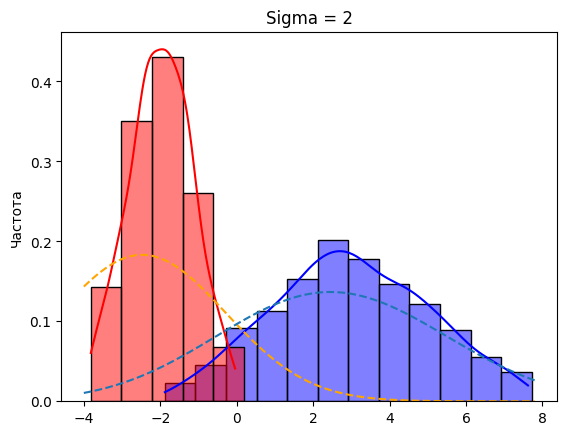

In [8]:
for sigma_val in (0.25, 0.4, 0.5, 1, 2):
    plot_samples(own_counter, num_samples_own, foreign_counter, num_samples_foreign, sigma_val)

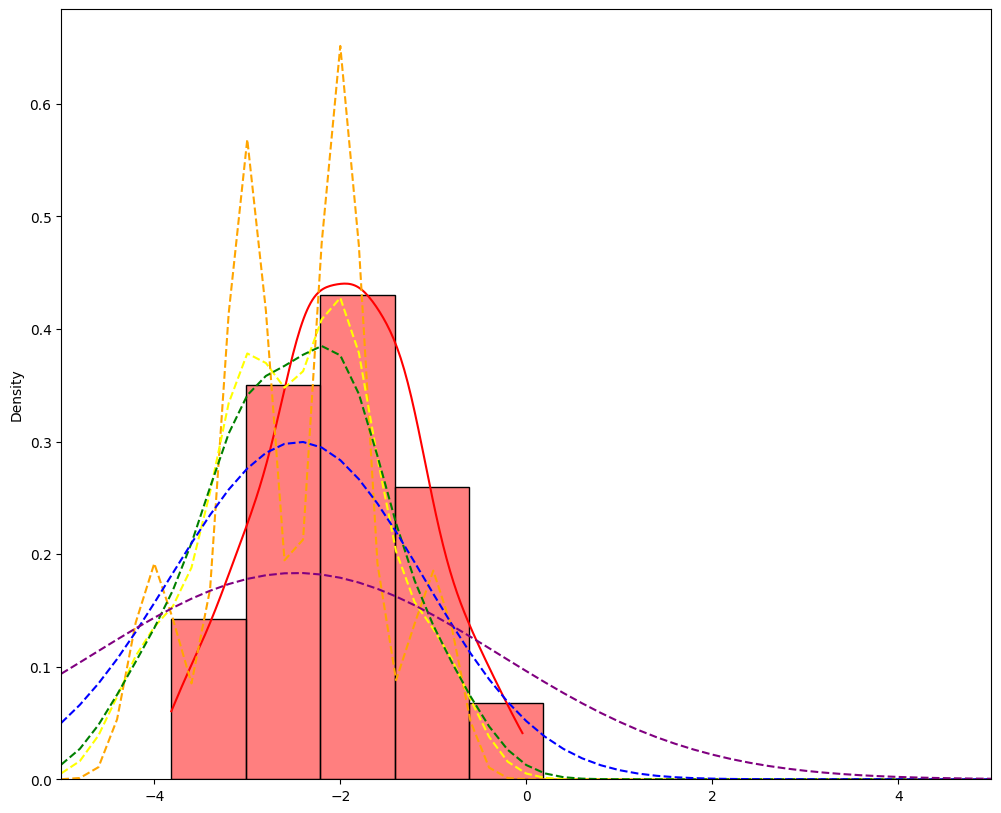

In [9]:
plt.figure(figsize=(12, 10))
plt.xlim((-5, 5))
sns.histplot(data=own_samples, color='red', kde=True, binwidth=0.8, stat='density')
for sigma_val, color in zip((0.25, 0.4, 0.5, 1, 2), ('orange', 'yellow', 'green', 'blue', 'purple')):
    x = np.arange(-5, 8, 0.2)
    own_y = parzen_window(own_counter, x, sigma_val, num_samples_own)
    plt.plot(x, own_y, linestyle='--', color=color)